# K-Means Clustering

## 1. Background

k-means clustering is a method for grouping unlabeled data into clusters that is
popular for cluster analysis in data mining. k-means clustering aims to partition $n$ observations into $k$ clusters by minimizing a criterion known as the inertia or within-cluster sum-of-squares. 

This algorithm requires the number of clusters to be specified. It scales well to large number of
samples and has been used across a large range of application areas in many different fields.

More formally, the k-means algorithm divides a set of $N$ samples $X$ into $K$ disjoint clusters $C$, each described by the mean $\mu_j$ of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from $X$, although they live in the same space. The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum of squared criterion:

\begin{equation*}\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_j - \mu_i||^2)\end{equation*}

Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are. 

<strong>Algorithm:</strong>

The most common algorithm uses an iterative refinement technique. Due to its ubiquity it is often called the k-means algorithm; it is also referred to as Lloyd's algorithm.

Given an initial set of k means $m_1,…,m_k$, the algorithm proceeds by alternating between two steps:
<ul>
<li>Assignment step: Assign each observation to the cluster whose mean yields the least within-cluster sum of squares (WCSS). Since the sum of squares is the squared Euclidean distance, this is intuitively the "nearest" mean.

(Mathematically, this means partitioning the observations according to the Voronoi diagram generated by the means).

$ S_{i}^{(t)}={\big \{}x_{p}:{\big \|}x_{p}-m_{i}^{(t)}{\big \|}^{2}\leq {\big \|}x_{p}-m_{j}^{(t)}{\big \|}^{2}\ \forall j,1\leq j\leq k{\big \}},$

where each 

$x_{p}$ is assigned to exactly one 
$S^{(t)}$, even if it could be assigned to two or more of them.
</li>
<li>Update step: Calculate the new means to be the centroids of the observations in the new clusters.

$m_{i}^{(t+1)}={\frac {1}{|S_{i}^{(t)}|}}\sum _{x_{j}\in S_{i}^{(t)}}x_{j}$

Since the arithmetic mean is a least-squares estimator, this also minimizes the within-cluster sum of squares (WCSS) objective. </li></ul>

<strong>Drawbacks:</strong>
<ul>
<li>Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.
</li>
<li>Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.</li>

A more detailed description can be found in the wiki article for [k-Means](https://en.wikipedia.org/wiki/K-means_clustering) and in the scikit learn page for [clustering](http://scikit-learn.org/stable/modules/clustering.html).

## 2. Simple Example

For this example we simply take the `iris` dataset and run a k-means algorithm to cluster the data points into 3 clusters (k=3).

Note that the clustering algorithm below takes into account all four features of the `iris` dataset.

This example was inspired by [example 1](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py) and [example 2](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).



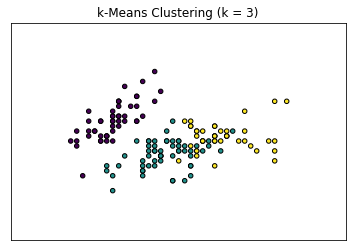

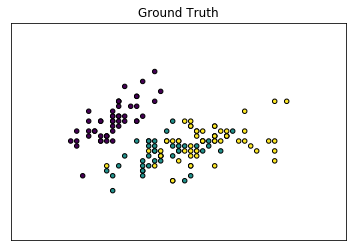

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()

k=3 #number of clusters

X = iris.data
y = iris.target
h = .02  # step size in the mesh

plt.clf()    
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# estimate clusters using k means 
plt.cla()
est=KMeans(n_clusters=k).fit(X)
labels = est.labels_

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1],edgecolors='k',s=20, c=labels.astype(np.float))
    
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title("k-Means Clustering (k = %i)" % (k))
plt.show()

# Plot the ground truth
plt.clf()
plt.cla()

# Reorder the labels to have colors matching the cluster results
plt.scatter(X[:, 0], X[:, 1], c=y,s=20, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title("Ground Truth")
plt.show()




## Plotting in three dimensions.

From this [example](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py).

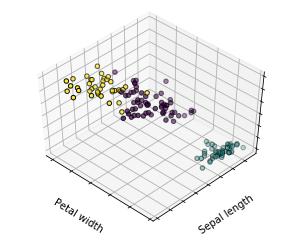

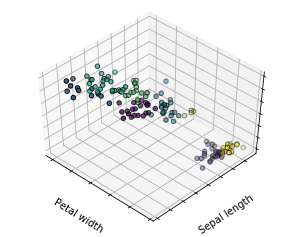

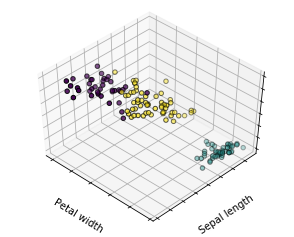

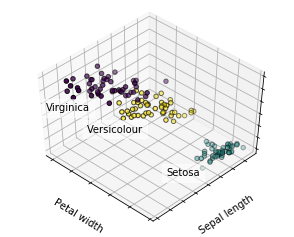

In [15]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8),
              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
                                              init='random')}

fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float),edgecolors='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y,edgecolors='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()